<a href="https://colab.research.google.com/github/Barttje/summercourse-ml/blob/master/neural_network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Initializing the training and test data, the input and the targets. 
x_train and x_test contain images. 

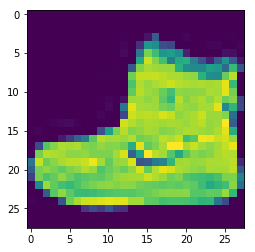

9


In [16]:
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

Images are from a fashion collection. 

In [23]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Explane more about shapes

In [35]:
image_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_size) # Transform from matrix to vector
x_train = x_train.astype('float32')
x_train /= 255 # Normalize inputs from 0-255 to 0.0-1.0

x_test = x_test.reshape(x_test.shape[0], image_size) # Transform from matrix to vector
x_test = x_test.astype('float32')
x_test /= 255 # Normalize inputs from 0-255 to 0.0-1.0

print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


Explain more about flattening

In [32]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape, y_test.shape)
print(y_train[0])

(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Explain hot encoding

In [33]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(image_size,))) # Input layer
model.add(Dense(units=num_classes, activation='softmax')) # Output layer
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Explain layers in the model

In [36]:
epochs = 5
model.fit(x_train, y_train, epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 15s 254us/step - loss: 0.4734 - acc: 0.8303
Epoch 2/5
60000/60000 [==============================] - 15s 246us/step - loss: 0.3596 - acc: 0.8680
Epoch 3/5
60000/60000 [==============================] - 15s 251us/step - loss: 0.3223 - acc: 0.8821
Epoch 4/5
60000/60000 [==============================] - 15s 243us/step - loss: 0.2995 - acc: 0.8885
Epoch 5/5
60000/60000 [==============================] - 15s 242us/step - loss: 0.2813 - acc: 0.8955


explain epochs, optionally batch_size, learning rate etc.

In [37]:
loss, accuracy  = model.evaluate(x_test, y_test)
print(loss, accuracy)

10000/10000 [==============================] - 1s 51us/step
0.38029201385974887 0.8639


explain loss and accuracy

[[7.1326883e-07 3.0962204e-09 1.2298420e-04 1.2951722e-06 1.6472118e-02
  1.0906385e-09 9.8340285e-01 9.7340289e-11 1.5829835e-07 1.8515477e-09]]
6
6


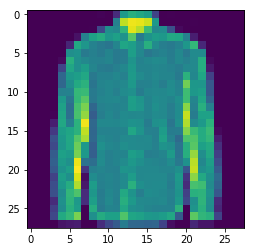

In [55]:
index = 123
pred = model.predict(x_test[-index:-index+1]) 
print(pred)
print(pred.argmax())
print(y_test[-index:-index+1].argmax())
plt.imshow(x_test[-index:-index+1][0].reshape(28,28))



explain prediction, explain arg max, compare with actual class